All data credits belong to the wonderful compilation work done of by **[Rekhta Foundation](https://www.rekhta.org)**.
Data has been parsed into Urdu, Hindi and English translieration thanks to their excellent data organization.
Consider supporting them for their great work in pushing the urdu language.

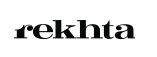

Credits to all the authors for their wonderful original creations. Their names have been attributed in the dataset.

In [5]:
# Scrape All Poets

import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import json

base_url = 'https://www.rekhta.org'
poets = []

for letter in tqdm(list(range(ord('A'), ord('Z') + 1)) + list(range(ord('a'), ord('z') + 1))):
    route = "poets"
    url = f'{base_url}/{route}'
    params = {
        "startswith": chr(letter)
    }
    response = requests.get(url, params=params)
    soup = BeautifulSoup(response.text, 'html.parser')

    for poet_div in soup.find_all('div', class_='poetColumn'):
        name_div = poet_div.find('div', class_='poetNameDatePlace')
        name_a = name_div.find('a')
        name = name_a.text.strip()
        href = name_a['href']

        location_div = poet_div.find('div', class_='poetPlaceDate')
        location_a = location_div.find('a')
        location_a = location_a.text if location_a is not None else None

        active_years = poet_div.find('span', class_='poetListDate')
        if active_years:
            active_years = active_years.text.strip()
        else:
            active_years = None
        description = poet_div.find('div', class_='poetDescColumn')
        if description and description.find('p'):
            description = description.find('p').text.strip()
        else:
            description = None

        poet = {
            'name': name,
            'href': href,
            'location': location_a,
            'active_years': active_years,
            'description': description
        }
        poets.append(poet)

with open("rekhta_poets_list.json", "w") as f:
    json.dump(poets, f, ensure_ascii=False, indent=2)

100%|██████████| 52/52 [00:07<00:00,  7.27it/s]


In [15]:
# Scrape Top Read Poets

import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import json

base_url = 'https://www.rekhta.org'
top_read_poets = []

route = "poets/top-read-poets"

url = f"{base_url}/{route}"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

for poet_div in soup.find_all('div', class_='poetColumn'):
    name_div = poet_div.find('div', class_='poetNameDatePlace')
    name_a = name_div.find('a')
    name = name_a.text.strip()
    href = name_a['href']

    location_div = poet_div.find('div', class_='poetPlaceDate')
    location_a = location_div.find('span', class_='poetListPlace')
    location_a = location_a.text.strip() if location_a is not None else None

    active_years = poet_div.find('span', class_='poetListDate')
    if active_years:
        active_years = active_years.text.strip()
    else:
        active_years = None
    description = poet_div.find('div', class_='poetDescColumn')
    if description and description.find('p'):
        description = description.find('p').text.strip()
    else:
        description = None

    poet = {
        'name': name,
        'href': href,
        'location': location_a,
        'active_years': active_years,
        'description': description
    }
    top_read_poets.append(poet)


with open("rekhta_top_poets_list.json", "w") as f:
    json.dump(top_read_poets, f, ensure_ascii=False, indent=2)

In [28]:
import urllib
import os

#captures the different <p> tags as newlines
def text_with_newlines(elem):
    text = ''
    for e in elem.descendants:
        print(e)
        if isinstance(e, str):
            text += e
        elif e.name == 'br' or e.name == 'p':
            text += '\n'
    return text


def parse_ghazal(url, keep_translation=False):
    print(url)
    html = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')
    print("id", os.path.basename(url))
    id_divs = soup.find_all("div", {"id": os.path.basename(url)})
    for i_divs in id_divs:
        poem_divs = i_divs.find("div", class_="pMC")
        if poem_divs is not None:
            break
    
    # this section removes some of the English translations present on the webpage
    # mixing language data would add noise, and make it difficult for the model to learn
    # BUT in future these urdu to english translations could be a valuable resource to prepare machine translation data 
    if not keep_translation:
        for div in poem_divs.find_all("div", {'class':'t'}): 
            div.decompose()
    
    print(poem_divs)
    poem = text_with_newlines(poem_divs)
    return poem

In [29]:
url_english='https://www.rekhta.org/ghazals/sitaaron-se-aage-jahaan-aur-bhii-hain-allama-iqbal-ghazals-1'
url_urdu='https://www.rekhta.org/ghazals/sitaaron-se-aage-jahaan-aur-bhii-hain-allama-iqbal-ghazals-1?lang=ur'
url_hindi='https://www.rekhta.org/ghazals/sitaaron-se-aage-jahaan-aur-bhii-hain-allama-iqbal-ghazals-1?lang=hi'

ghazal = parse_ghazal('https://www.rekhta.org/ghazals/sitaaron-se-aage-jahaan-aur-bhii-hain-allama-iqbal-ghazals-1', True)
print(ghazal)

# okay I have a problem the way this urdu font is rendered. It is absolutely terrible to read.
# There have to be better font options.


https://www.rekhta.org/ghazals/sitaaron-se-aage-jahaan-aur-bhii-hain-allama-iqbal-ghazals-1
id sitaaron-se-aage-jahaan-aur-bhii-hain-allama-iqbal-ghazals-1
<div class="pMC" data-pc="7" data-roman="off"><div class="w" data-p="1"><div class="c"><p data-l="1"><span data-m="\1kl9">sitāroñ </span><span data-m="\1nr7">se </span><span data-m="\1axp">aage </span><span data-m="\2633">jahāñ </span><span data-m="\09va">aur </span><span data-m="\0dh6">bhī </span><span data-m="\0zgl">haiñ </span></p><p data-l="2"><span data-m="\1gl5">abhī </span><span data-m="BIw35QhAVKPeYtaCfZKl6zPW1+0jCfpKnu+FuRrg7mU=">ishq </span><span data-m="\12od">ke </span><span data-m="\2z6g">imtihāñ </span><span data-m="\09va">aur </span><span data-m="\0dh6">bhī </span><span data-m="\0zgl">haiñ </span></p></div></div><div class="w" data-p="2"><div class="c"><p data-l="3"><span data-m="\2kto">tahī </span><span data-m="\1oad">zindagī </span><span data-m="\1nr7">se </span><span data-m="\1f3o">nahīñ </span><span data-m="\2p25"

## Parsed text samples

### English transliteration

sitāroñ se aage jahāñ aur bhī haiñ abhī ishq ke imtihāñ aur bhī haiñ

tū shāhīñ hai parvāz hai kaam terā tire sāmne āsmāñ aur bhī haiñ 

isī roz o shab meñ ulajh kar na rah jā ki tere zamān o makāñ aur bhī haiñ

### Urdu 

ستاروں سے آگے جہاں اور بھی ہیں

تو شاہیں ہے پرواز ہے کام تیرا ترے سامنے آسماں اور بھی ہیں

اسی روز و شب میں الجھ کر نہ رہ جا کہ تیرے زمان و مکاں اور بھی ہیں


### Hindi 
सितारों से आगे जहाँ और भी हैं अभी इश्क़ के इम्तिहाँ और भी हैं

तू शाहीं है परवाज़ है काम तेरा तिरे सामने आसमाँ और भी हैं

इसी रोज़ ओ शब में उलझ कर न रह जा कि तेरे ज़मान ओ मकाँ और भी हैं

### Observing the structure of urls to make sure the same script would work across different poets on the webpage

In [249]:
#The folder structure has urls as https://www.rekhta.org/ghazals/
#https://www.rekhta.org/ghazals/tire-ishq-kii-intihaa-chaahtaa-huun-allama-iqbal-ghazals
#Iqbal
url='https://www.rekhta.org/ghazals/tire-ishq-kii-intihaa-chaahtaa-huun-allama-iqbal-ghazals'
url= 'https://www.rekhta.org/ghazals/kabhii-ai-haqiiqat-e-muntazar-nazar-aa-libaas-e-majaaz-men-allama-iqbal-ghazals'

##Ghalib's ghazals
## there are currently 234 ghazals by this poet on the page
## which makes it a rich resource for training a text model
url= 'https://www.rekhta.org/ghazals/hazaaron-khvaahishen-aisii-ki-har-khvaahish-pe-dam-nikle-mirza-ghalib-ghazals'
url ='https://www.rekhta.org/ghazals/hazaaron-khvaahishen-aisii-ki-har-khvaahish-pe-dam-nikle-mirza-ghalib-ghazals?lang=ur'
url='https://www.rekhta.org/ghazals/hazaaron-khvaahishen-aisii-ki-har-khvaahish-pe-dam-nikle-mirza-ghalib-ghazals?lang=hi'
url='https://www.rekhta.org/ghazals/har-ek-baat-pe-kahte-ho-tum-ki-tuu-kyaa-hai-mirza-ghalib-ghazals'

url='https://www.rekhta.org/ghazals/ishq-mujh-ko-nahiin-vahshat-hii-sahii-mirza-ghalib-ghazals'
url='https://www.rekhta.org/ghazals/ishq-mujh-ko-nahiin-vahshat-hii-sahii-mirza-ghalib-ghazals?lang=ur'
url='https://www.rekhta.org/ghazals/ishq-mujh-ko-nahiin-vahshat-hii-sahii-mirza-ghalib-ghazals?lang=hi'

url='https://www.rekhta.org/ghazals/koii-din-gar-zindagaanii-aur-hai-mirza-ghalib-ghazals'
url='https://www.rekhta.org/ghazals/koii-din-gar-zindagaanii-aur-hai-mirza-ghalib-ghazals?lang=ur'

url='https://www.rekhta.org/ghazals/hai-bazm-e-butaan-men-sukhan-aazurda-labon-se-mirza-ghalib-ghazals'
url='https://www.rekhta.org/ghazals/hai-bazm-e-butaan-men-sukhan-aazurda-labon-se-mirza-ghalib-ghazals?lang=ur'

url='https://www.rekhta.org/ghazals/ghar-jab-banaa-liyaa-tire-dar-par-kahe-bagair-mirza-ghalib-ghazals'
url='https://www.rekhta.org/ghazals/ghar-jab-banaa-liyaa-tire-dar-par-kahe-bagair-mirza-ghalib-ghazals?lang=hi'
url='https://www.rekhta.org/ghazals/ghar-jab-banaa-liyaa-tire-dar-par-kahe-bagair-mirza-ghalib-ghazals?lang=ur'

## Sahir Ludhianvi
url='https://www.rekhta.org/ghazals/kabhii-khud-pe-kabhii-haalaat-pe-ronaa-aayaa-sahir-ludhianvi-ghazals'
url='https://www.rekhta.org/ghazals/kabhii-khud-pe-kabhii-haalaat-pe-ronaa-aayaa-sahir-ludhianvi-ghazals?lang=ur'
url= 'https://www.rekhta.org/ghazals/kabhii-khud-pe-kabhii-haalaat-pe-ronaa-aayaa-sahir-ludhianvi-ghazals?lang=hi'



## Faiz
en_url='https://www.rekhta.org/ghazals/gulon-men-rang-bhare-baad-e-nau-bahaar-chale-faiz-ahmad-faiz-ghazals'
hindi_url='https://www.rekhta.org/ghazals/gulon-men-rang-bhare-baad-e-nau-bahaar-chale-faiz-ahmad-faiz-ghazals?lang=hi'
urdu_url='https://www.rekhta.org/ghazals/gulon-men-rang-bhare-baad-e-nau-bahaar-chale-faiz-ahmad-faiz-ghazals?lang=ur'



url='https://www.rekhta.org/ghazals/hazaaron-khvaahishen-aisii-ki-har-khvaahish-pe-dam-nikle-mirza-ghalib-ghazals'#?lang=ur'
ghazal = parse_ghazal(url)
print(ghazal)


hazāroñ ḳhvāhisheñ aisī ki har ḳhvāhish pe dam nikle 
bahut nikle mire armān lekin phir bhī kam nikle 
Dare kyuuñ merā qātil kyā rahegā us kī gardan par 
vo ḳhuuñ jo chashm-e-tar se umr bhar yuuñ dam-ba-dam nikle 
nikalnā ḳhuld se aadam kā sunte aa.e haiñ lekin 
bahut be-ābrū ho kar tire kūche se ham nikle 
bharam khul jaa.e zālim tere qāmat kī darāzī kā 
agar is turra-e-pur-pech-o-ḳham kā pech-o-ḳham nikle 
magar likhvā.e koī us ko ḳhat to ham se likhvā.e 
huī sub.h aur ghar se kaan par rakh kar qalam nikle 
huī is daur meñ mansūb mujh se bāda-ashāmī 
phir aayā vo zamāna jo jahāñ meñ jām-e-jam nikle 
huī jin se tavaqqo ḳhastagī kī daad paane kī 
vo ham se bhī ziyāda ḳhasta-e-teġh-e-sitam nikle 
mohabbat meñ nahīñ hai farq jiine aur marne kā 
usī ko dekh kar jiite haiñ jis kāfir pe dam nikle 
kahāñ mai-ḳhāne kā darvāza 'ġhālib' aur kahāñ vaa.iz 
par itnā jānte haiñ kal vo jaatā thā ki ham nikle 


In [336]:
#testing the homepage for parsing all poet names now
#for ghalib

def parse_webpage_at_given_scroll(html):
    ctr=0
    soup= BeautifulSoup(html, 'html.parser')
    mydivs = soup.find("div", {"class": "contentListBody"})
    titles=[]
    for a in mydivs.find_all('a', href=True):
        t=a['href']
        if t not in titles:
            if ctr%5==0:
                print("Found the URL:", t)
            titles.append(t)
            ctr+=1
    print('=============================')    
    print('number of titles',len(titles))
    print('=============================')
    
    return titles


In [337]:
#language argument can be ur or hi for urdu or hindi
def read_and_write_web(author,language='ur'):
    
    lang=language
    #author='mirza-ghalib'
    author_lan=author+'/'+lang
    if not os.path.exists(author_lan):
        os.makedirs(author_lan)

    for url in titles:
        name_poem=url.split('https://www.rekhta.org/ghazals/')[1]
        path_poem= author_lan+'/'+name_poem
        if os.path.exists(path_poem):
            pass
        else:
            f= open(path_poem,"w+")
            if lang=='en':
                    url_for_lang= url
            else:
                url_for_lang= url+'?lang='+lang
            ghazal = parse_ghazal(url_for_lang)
            f.write(ghazal)
            f.close()


In [ ]:
##Parsing based on home page of authors
url_base='https://www.rekhta.org/poets/'

## TODO : Later
## or just iterate through the list of all poets on the index, instead of hand curated list
authors=['mirza-ghalib','allama-iqbal','faiz-ahmad-faiz','sahir-ludhianvi','meer-taqi-meer',
         'dagh-dehlvi','kaifi-azmi','gulzar','bahadur-shah-zafar','parveen-shakir',
         'jaan-nisar-akhtar','javed-akhtar','jigar-moradabadi','jaun-eliya',
         'ahmad-faraz','meer-anees','mohsin-naqvi','firaq-gorakhpuri','fahmida-riaz','wali-mohammad-wali',
        'waseem-barelvi','akbar-allahabadi','altaf-hussain-hali','ameer-khusrau','naji-shakir','naseer-turabi'
        ,'nazm-tabatabai','nida-fazli','noon-meem-rashid','habib-jalib']



for author in authors:
    url_home_page= url_base +author+ '/ghazals'
    html = urllib.request.urlopen(url_home_page).read()
    titles= parse_webpage_at_given_scroll(html)
    read_and_write_web(author,'en')
    read_and_write_web(author,'ur')
    read_and_write_web(author,'hi')

Found the URL: https://www.rekhta.org/ghazals/aah-ko-chaahiye-ik-umr-asar-hote-tak-mirza-ghalib-ghazals
Found the URL: https://www.rekhta.org/ghazals/har-ek-baat-pe-kahte-ho-tum-ki-tuu-kyaa-hai-mirza-ghalib-ghazals
Found the URL: https://www.rekhta.org/ghazals/rahiye-ab-aisii-jagah-chal-kar-jahaan-koii-na-ho-mirza-ghalib-ghazals
Found the URL: https://www.rekhta.org/ghazals/muddat-huii-hai-yaar-ko-mehmaan-kiye-hue-mirza-ghalib-ghazals
Found the URL: https://www.rekhta.org/ghazals/gair-len-mahfil-men-bose-jaam-ke-mirza-ghalib-ghazals
Found the URL: https://www.rekhta.org/ghazals/sab-kahaan-kuchh-laala-o-gul-men-numaayaan-ho-gaiin-mirza-ghalib-ghazals
Found the URL: https://www.rekhta.org/ghazals/dil-se-tirii-nigaah-jigar-tak-utar-gaii-mirza-ghalib-ghazals
Found the URL: https://www.rekhta.org/ghazals/diivaangii-se-dosh-pe-zunnaar-bhii-nahiin-mirza-ghalib-ghazals
Found the URL: https://www.rekhta.org/ghazals/jahaan-teraa-naqsh-e-qadam-dekhte-hain-mirza-ghalib-ghazals
Found the URL: https


ہم کو مٹا سکے یہ زمانے میں دم نہیں 
ہم سے زمانہ خود ہے زمانے سے ہم نہیں

हम को मिटा सके ये ज़माने में दम नहीं 
हम से ज़माना ख़ुद है ज़माने से हम नहीं 
            
            Jigar Moradabadi

